In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from scipy.stats import uniform


%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, validation_curve
from sklearn.pipeline import Pipeline as Pipeline, make_pipeline as make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.utils import resample
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline as Imbpipeline
from imblearn.pipeline import make_pipeline as Imb_make_pipeline

from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

df_data_set = pd.read_csv(r'C:\Users\moham\Dropbox\QSE\Thesis\Geopattern\My data\df_data_set_North_America.csv')

columns = ['Log_Geo_Dist',
 'TENB',
 'Cog_Dist',
 'Top_regions',
 'Prov_Border',
 'NotContig',
 'Province_1_Alberta',
 'Province_1_Arizona',
 'Province_1_California',
 'Province_1_Manitoba',
 'Province_1_Quebec',
 'Province_2_Alberta',
 'Province_2_Arizona',
 'Province_2_California',
 'Province_2_Missouri',
 'Province_2_Quebec',
 'Province_1_Colorado',
 'Province_1_Maryland',
 'Province_1_Massachusetts',
 'Province_1_Minnesota',
 'Province_1_Missouri',
 'Province_1_New York',
 'Province_1_Ontario',
 'Province_1_Pennsylvania',
 'Province_1_Washington',
 'Province_2_Colorado',
 'Province_2_Maryland',
 'Province_2_Massachusetts',
 'Province_2_Minnesota',
 'Province_2_New York',
 'Province_2_Ontario',
 'Province_2_Pennsylvania',
 'Province_2_Washington',
 'Province_1_Connecticut',
 'Province_1_Florida',
 'Province_1_Illinois',
 'Province_1_Iowa',
 'Province_1_Oklahoma',
 'Province_1_South Carolina',
 'Province_2_Connecticut',
 'Province_2_Florida',
 'Province_2_Illinois',
 'Province_2_Iowa',
 'Province_2_Oklahoma',
 'Province_2_South Carolina',
 'Province_1_Alabama',
 'Province_1_Arkansas',
 'Province_1_Ohio',
 'Province_1_Oregon',
 'Province_1_Wisconsin',
 'Province_2_Alabama',
 'Province_2_Arkansas',
 'Province_2_Manitoba',
 'Province_2_Ohio',
 'Province_2_Oregon',
 'Province_2_Wisconsin',
 'Province_1_British Columbia',
 'Province_1_Louisiana',
 'Province_1_Mississippi',
 'Province_1_New Jersey',
 'Province_1_Texas',
 'Province_1_Wyoming',
 'Province_2_British Columbia',
 'Province_2_Louisiana',
 'Province_2_Mississippi',
 'Province_2_New Jersey',
 'Province_2_Texas',
 'Province_2_Wyoming',
 'Province_1_Delaware',
 'Province_1_District of Columbia',
 'Province_1_Michigan',
 'Province_1_Saskatchewan',
 'Province_1_Tennessee',
 'Province_1_Virginia',
 'Province_2_Delaware',
 'Province_2_District of Columbia',
 'Province_2_Michigan',
 'Province_2_Saskatchewan',
 'Province_2_Tennessee',
 'Province_2_Virginia',
 'Province_1_Georgia',
 'Province_2_Georgia',
 'Province_2_North Carolina',
 'Province_1_Indiana',
 'Province_1_Kansas',
 'Province_1_North Carolina',
 'Province_2_Indiana',
 'Province_2_Kansas',
 'Province_1_Alaska',
 'Province_2_Alaska',
 'Province_1_New Mexico',
 'Province_2_New Mexico',
 'Province_1_Hawaii',
 'Province_1_Idaho',
 'Province_2_Hawaii',
 'Province_2_Idaho',
 'Province_1_Utah',
 'Province_1_West Virginia',
 'Province_2_Utah',
 'Province_2_West Virginia',
 'Province_1_Maine',
 'Province_1_Nova Scotia',
 'Province_1_Rhode Island',
 'Province_2_Maine',
 'Province_2_Nova Scotia',
 'Province_2_Rhode Island',
 'Province_1_Montana',
 'Province_1_Nebraska',
 'Province_1_Nevada',
 'Province_1_New Brunswick',
 'Province_1_New Hampshire',
 'Province_1_Vermont',
 'Province_2_Montana',
 'Province_2_Nebraska',
 'Province_2_Nevada',
 'Province_2_New Brunswick',
 'Province_2_New Hampshire',
 'Province_2_Vermont']

X = df_data_set[columns]
y = df_data_set.collaboration_binary

In [2]:
unique, count = np.unique (y, return_counts = True)

y_value_count = {k : v for (k,v) in zip(unique,count)}

print ('Dataset', y_value_count)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123, stratify = y)

unique, count = np.unique (y_test, return_counts = True)

y_value_count = {k : v for (k,v) in zip(unique,count)}

print ('Dataset Test', y_value_count)

Dataset {0: 251480, 1: 1595}
Dataset Test {0: 25148, 1: 160}


In [3]:
logreg = LogisticRegression(max_iter = 500)
rnd = RandomForestClassifier(random_state = 123, n_jobs = -1)
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss')
knn = KNeighborsClassifier()
rus = RandomUnderSampler()
ros = RandomOverSampler()
sm = SMOTE()
smtk = SMOTETomek(n_jobs = 6)
smnn = SMOTEENN(n_jobs = 6)
scl = StandardScaler()
feature_selection_selbest = SelectKBest(chi2, k=7)
feature_selection_selmodel = SelectFromModel(logreg)

In [5]:
# baseline (RandomForest)

print ('Simple baseline results:')

rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred))
print ('Presicion:' , precision_score(y_test, y_pred))
print ('Recall:' , recall_score(y_test, y_pred))
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred))
print ('Classification Report:')
print (classification_report(y_test, y_pred))
print('\n')

# baseline + Feature selection

print ('Baseline + feature selection:')

pipe_fs = Pipeline(steps = [['feature_selection', feature_selection_selmodel], ['RandomForestClassifier', rnd]])

pipe_fs.fit(X_train, y_train)
y_pred_fs = pipe_fs.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_fs))
print ('Presicion:' , precision_score(y_test, y_pred_fs))
print ('Recall:' , recall_score(y_test, y_pred_fs))
print ('Accuracy:', accuracy_score(y_test, y_pred_fs))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_fs))
print ('Classification Report:')
print (classification_report(y_test, y_pred_fs))
print('\n')


print ('Baseline + standardscalar :')

pipe_scl = Pipeline(steps = [['SCL', scl], ['RandomForestClassifier', rnd]])

pipe_scl.fit(X_train, y_train)
y_pred_scl = pipe_scl.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_scl))
print ('Presicion:' , precision_score(y_test, y_pred_scl))
print ('Recall:' , recall_score(y_test, y_pred_scl))
print ('Accuracy:', accuracy_score(y_test, y_pred_scl))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_scl))
print ('Classification Report:')
print (classification_report(y_test, y_pred_scl))
print('\n')


print ('Baseline + random over sampling:')

pipe_ros = Imbpipeline(steps = [['ROS', ros], ['RandomForestClassifier', rnd]])

pipe_ros.fit(X_train, y_train)
y_pred_ros = pipe_ros.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_ros))
print ('Presicion:' , precision_score(y_test, y_pred_ros))
print ('Recall:' , recall_score(y_test, y_pred_ros))
print ('Accuracy:', accuracy_score(y_test, y_pred_ros))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_ros))
print ('Classification Report:')
print (classification_report(y_test, y_pred_ros))
print('\n')

Simple baseline results:
F1_Score: 0.8673139158576051
Presicion: 0.8993288590604027
Recall: 0.8375
Accuracy: 0.9983799589062747
confusion_matrix:
[[25133    15]
 [   26   134]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25148
           1       0.90      0.84      0.87       160

    accuracy                           1.00     25308
   macro avg       0.95      0.92      0.93     25308
weighted avg       1.00      1.00      1.00     25308



Baseline + feature selection:
F1_Score: 0.8617363344051447
Presicion: 0.8874172185430463
Recall: 0.8375
Accuracy: 0.9983009325114588
confusion_matrix:
[[25131    17]
 [   26   134]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25148
           1       0.89      0.84      0.86       160

    accuracy                           1.00     25308
   macro avg       0.94      0.92      0.93     

In [7]:
# baseline (XGBoost)

print ('Simple baseline results:')

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred))
print ('Presicion:' , precision_score(y_test, y_pred))
print ('Recall:' , recall_score(y_test, y_pred))
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred))
print ('Classification Report:')
print (classification_report(y_test, y_pred))
print('\n')

# baseline + Feature selection

print ('Baseline + feature selection:')

pipe_fs = Pipeline(steps = [['feature_selection', feature_selection_selmodel], ['XGBoost', xgb]])

pipe_fs.fit(X_train, y_train)
y_pred_fs = pipe_fs.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_fs))
print ('Presicion:' , precision_score(y_test, y_pred_fs))
print ('Recall:' , recall_score(y_test, y_pred_fs))
print ('Accuracy:', accuracy_score(y_test, y_pred_fs))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_fs))
print ('Classification Report:')
print (classification_report(y_test, y_pred_fs))
print('\n')


print ('Baseline + standardscalar :')

pipe_scl = Pipeline(steps = [['SCL', scl], ['XGBoost', xgb]])

pipe_scl.fit(X_train, y_train)
y_pred_scl = pipe_scl.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_scl))
print ('Presicion:' , precision_score(y_test, y_pred_scl))
print ('Recall:' , recall_score(y_test, y_pred_scl))
print ('Accuracy:', accuracy_score(y_test, y_pred_scl))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_scl))
print ('Classification Report:')
print (classification_report(y_test, y_pred_scl))
print('\n')


print ('Baseline + random over sampling:')

pipe_ros = Imbpipeline(steps = [['ROS', ros], ['XGBoost', xgb]])

pipe_ros.fit(X_train, y_train)
y_pred_ros = pipe_ros.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_ros))
print ('Presicion:' , precision_score(y_test, y_pred_ros))
print ('Recall:' , recall_score(y_test, y_pred_ros))
print ('Accuracy:', accuracy_score(y_test, y_pred_ros))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_ros))
print ('Classification Report:')
print (classification_report(y_test, y_pred_ros))
print('\n')

Simple baseline results:
F1_Score: 0.8431372549019608
Presicion: 0.8835616438356164
Recall: 0.80625
Accuracy: 0.9981033665244191
confusion_matrix:
[[25131    17]
 [   31   129]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25148
           1       0.88      0.81      0.84       160

    accuracy                           1.00     25308
   macro avg       0.94      0.90      0.92     25308
weighted avg       1.00      1.00      1.00     25308



Baseline + feature selection:
F1_Score: 0.8284789644012946
Presicion: 0.8590604026845637
Recall: 0.8
Accuracy: 0.9979058005373795
confusion_matrix:
[[25127    21]
 [   32   128]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25148
           1       0.86      0.80      0.83       160

    accuracy                           1.00     25308
   macro avg       0.93      0.90      0.91     25

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  30 | elapsed:  2.0min remaining: 56.9min
[Parallel(n_jobs=-1)]: Done   3 out of  30 | elapsed:  5.6min remaining: 50.3min
[Parallel(n_jobs=-1)]: Done   5 out of  30 | elapsed:  7.9min remaining: 39.5min
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed: 10.7min remaining: 35.3min
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed: 12.3min remaining: 28.7min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed: 14.0min remaining: 24.1min
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed: 18.0min remaining: 23.6min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed: 20.2min remaining: 20.2min
[Parallel(n_jobs=-1)]: Done  17 out of  30 | elapsed: 22.2min remaining: 16.9min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 24.6min remaining: 14.3min
[Parallel(n_jobs=-1)]: Done  21 out of  30 | elapsed: 27.6min remaining: 11.8min
[Parallel(n_jobs=-1)]: Done  23 o

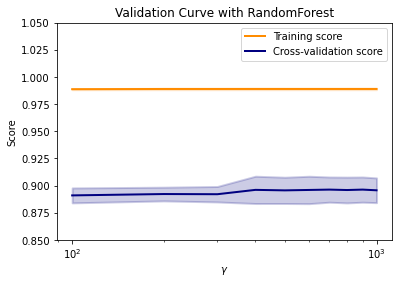

In [8]:
# Validation curve - n_estimators

param_range = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

skf = StratifiedKFold(n_splits = 3)

train_scores, test_scores = validation_curve(rnd, X_train, y_train, 
                           param_name = 'n_estimators', 
                           param_range = param_range,
                           cv = skf, n_jobs = -1, verbose = 30, scoring = 'f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(.85, 1.05)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

test_scores_mean

In [12]:
print(np.std(test_scores_mean))


0.0019703568778016768


array([0.8910297 , 0.89227292, 0.89211434, 0.89611232, 0.89565191,
       0.89603261, 0.89635738, 0.89596504, 0.89635738, 0.89572108])

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of  93 | elapsed:    2.5s remaining:  4.0min
[Parallel(n_jobs=6)]: Done   4 out of  93 | elapsed:   37.1s remaining: 13.8min
[Parallel(n_jobs=6)]: Done   7 out of  93 | elapsed:  1.1min remaining: 13.2min
[Parallel(n_jobs=6)]: Done  10 out of  93 | elapsed:  1.8min remaining: 15.3min
[Parallel(n_jobs=6)]: Done  13 out of  93 | elapsed:  2.3min remaining: 14.0min
[Parallel(n_jobs=6)]: Done  16 out of  93 | elapsed:  3.1min remaining: 14.8min
[Parallel(n_jobs=6)]: Done  19 out of  93 | elapsed:  3.5min remaining: 13.8min
[Parallel(n_jobs=6)]: Done  22 out of  93 | elapsed:  4.3min remaining: 13.8min
[Parallel(n_jobs=6)]: Done  25 out of  93 | elapsed:  4.8min remaining: 13.0min
[Parallel(n_jobs=6)]: Done  28 out of  93 | elapsed:  5.4min remaining: 12.6min
[Parallel(n_jobs=6)]: Done  31 out of  93 | elapsed:  5.7min remaining: 11.5min
[Parallel(n_jobs=6)]: Done  34 out of  93 | e

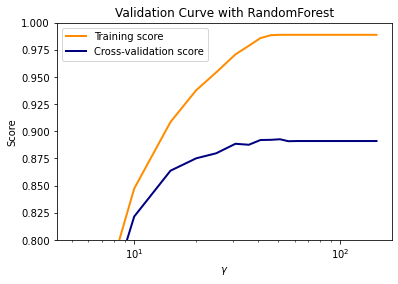

array([       nan, 0.63617131, 0.82157178, 0.86375008, 0.87514887,
       0.87975661, 0.88849863, 0.88760133, 0.89197719, 0.89213084,
       0.89266626, 0.89086925, 0.8910297 , 0.8910297 , 0.8910297 ,
       0.8910297 , 0.8910297 , 0.8910297 , 0.8910297 , 0.8910297 ,
       0.8910297 , 0.8910297 , 0.8910297 , 0.8910297 , 0.8910297 ,
       0.8910297 , 0.8910297 , 0.8910297 , 0.8910297 , 0.8910297 ,
       0.8910297 ])

In [20]:
# Validation curve - max_depth

max_depth = [int(x) for x in np.linspace(0, 150, num = 30)]
max_depth.append(None)

param_range = max_depth

skf = StratifiedKFold(n_splits = 3)

train_scores, test_scores = validation_curve(rnd, X_train, y_train, 
                           param_name = 'max_depth', 
                           param_range = param_range,
                           cv = skf, n_jobs = -1, verbose = 45, scoring = 'f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(.8, 1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

test_scores_mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  30 | elapsed:    2.9s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of  30 | elapsed:  1.5min remaining: 13.7min
[Parallel(n_jobs=-1)]: Done   5 out of  30 | elapsed:  1.6min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:  1.6min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:  1.6min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:  3.1min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:  3.2min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  3.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  17 out of  30 | elapsed:  3.2min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  3.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  21 out of  30 | elapsed:  4.9min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  23 o

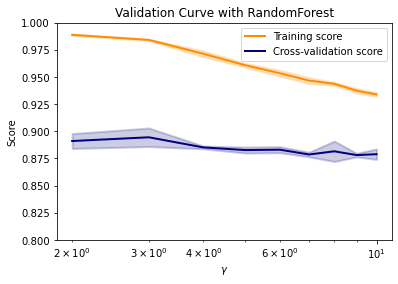

array([       nan, 0.8910297 , 0.89448012, 0.88517791, 0.88270517,
       0.88307001, 0.8786405 , 0.88159265, 0.87809862, 0.87892462])

In [23]:
# Validation curve - min_sample_split

min_sample_split = [1,2,3,4,5,6,7,8,9,10]

param_range = min_sample_split

skf = StratifiedKFold(n_splits = 3)

train_scores, test_scores = validation_curve(rnd, X_train, y_train, 
                           param_name = 'min_samples_split', 
                           param_range = param_range,
                           cv = skf, n_jobs = -1, verbose = 30, scoring = 'f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(.8, 1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


test_scores_mean

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  33 | elapsed:    0.8s remaining:   28.3s
[Parallel(n_jobs=-1)]: Done   2 out of  33 | elapsed:  1.6min remaining: 24.5min
[Parallel(n_jobs=-1)]: Done   3 out of  33 | elapsed:  1.6min remaining: 15.8min
[Parallel(n_jobs=-1)]: Done   4 out of  33 | elapsed:  1.6min remaining: 11.5min
[Parallel(n_jobs=-1)]: Done   5 out of  33 | elapsed:  1.6min remaining:  8.9min
[Parallel(n_jobs=-1)]: Done   6 out of  33 | elapsed:  1.6min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done   7 out of  33 | elapsed:  1.6min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:  1.6min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   9 out of  33 | elapsed:  1.7min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  10 out of  33 | elapsed:  1.7min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  11 out of  33 | elapsed:  3.4min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done  12 o

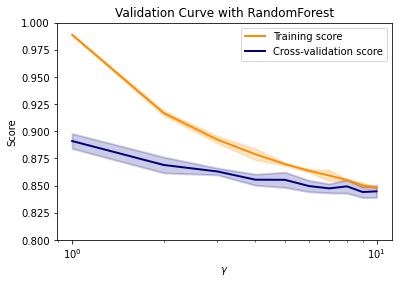

array([       nan, 0.8910297 , 0.86900941, 0.86303901, 0.85546553,
       0.85535422, 0.8496069 , 0.84749096, 0.84933685, 0.84414588,
       0.84475623])

In [24]:
# Validation curve - min_sample_leaf

min_sample_leaf = [0,1,2,3,4,5,6,7,8,9,10]

param_range = min_sample_leaf

skf = StratifiedKFold(n_splits = 3)

train_scores, test_scores = validation_curve(rnd, X_train, y_train, 
                           param_name = 'min_samples_leaf', 
                           param_range = param_range,
                           cv = skf, n_jobs = -1, verbose = 50, scoring = 'f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(.8, 1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


test_scores_mean

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   6 | elapsed:  1.4min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished


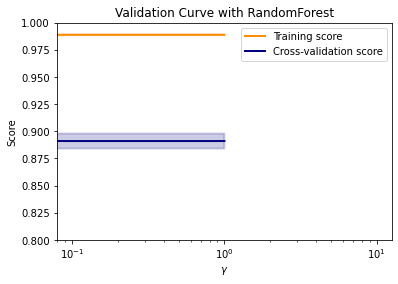

array([0.8910297 , 0.88910337])

In [25]:
# Validation curve - bootstrap

bootstrap = [True, False]

param_range = bootstrap

skf = StratifiedKFold(n_splits = 3)

train_scores, test_scores = validation_curve(rnd, X_train, y_train, 
                           param_name = 'bootstrap', 
                           param_range = param_range,
                           cv = skf, n_jobs = -1, verbose = 6, scoring = 'f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(.8, 1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


test_scores_mean

In [42]:
# Hyperparameter tuning - Randomforestclassifier - RandomSearch


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 26)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 60, num = 20)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,3,4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1]

# Method of selecting samples for training each tree
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print('Parameters used in the grid:\n')
pprint(param_dist)

skf = StratifiedKFold(n_splits = 5)

rnd_srch_model = RandomizedSearchCV(estimator = rnd,
                           param_distributions = param_dist, 
                           cv = skf, n_jobs = -1, 
                           verbose = 1,
                           n_iter = 120,
                           scoring = 'f1',
                           random_state = 123)

rnd_srch_model.fit(X_train, y_train)
# y_pred = rnd_srch_model.best_estimator_.predict(X_test)
print ('Best Parameters', rnd_srch_model.best_params_)
print ('Best Score', rnd_srch_model.best_score_)

# print ('Presicion:' , precision_score(y_test, y_pred))
# print ('Recall:' , recall_score(y_test, y_pred))
# print ('F1_Score:', f1_score(y_test, y_pred))



# Hyperparameter tuning - Randomforestclassifier ----- RESULTS

# Best Parameters {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 56, 'bootstrap': True}
# Best Score 0.8994353095351266

Parameters used in the grid:

{'bootstrap': [True, False],
 'max_depth': [40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
               50,
               51,
               52,
               53,
               54,
               55,
               56,
               57,
               58,
               60,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
                  140,
                  150,
                  160,
                  170,
                  180,
                  190,
                  200,
                  210,
                  220,
                  230,
             

In [43]:
# Random Search Best parameters result (test data)

rnd_best = RandomForestClassifier(random_state = 123, n_jobs = -1,
                                       n_estimators = 200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = 'sqrt',
                                       max_depth = 56,
                                       bootstrap = True)

rnd_best.fit(X_train, y_train)
y_pred_best = rnd_best.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_best))
print ('Presicion:' , precision_score(y_test, y_pred_best))
print ('Recall:' , recall_score(y_test, y_pred_best))
print ('Accuracy:', accuracy_score(y_test, y_pred_best))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_best))
print ('Classification Report:')
print (classification_report(y_test, y_pred_best))

# rfc_cv_score = cross_val_score(rnd_best, X_train, y_train, cv = skf, scoring = 'f1')

# print ('F1_Score_cv_score:', rfc_cv_score.mean())


F1_Score: 0.8745980707395499
Presicion: 0.9006622516556292
Recall: 0.85
Accuracy: 0.9984589853010906
confusion_matrix:
[[25133    15]
 [   24   136]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25148
           1       0.90      0.85      0.87       160

    accuracy                           1.00     25308
   macro avg       0.95      0.92      0.94     25308
weighted avg       1.00      1.00      1.00     25308



In [ ]:
# Hyperparameter tuning - Randomforestclassifier - Grid search


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 190, stop = 210, num = 11)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 60, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1]

# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print('Parameters used in the grid:\n')
pprint(param_grid)

skf = StratifiedKFold(n_splits = 5)

gird_model = GridSearchCV(estimator = rnd,
                         param_grid = param_grid, 
                         cv = skf, n_jobs = -1, 
                         verbose = 1,
                         scoring = 'f1')

grid_model.fit(X_train, y_train)

print ('Best Parameters', grid_model.best_params_)
print ('Best Score', grid_model.best_score_)

# Best Parameters {'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
# Best Score 0.8999716516847073

In [52]:
# grid Search Best parameters result (test data)

grd_best = RandomForestClassifier(random_state = 123, n_jobs = -1,
                                       n_estimators = 210,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = 'auto',
                                       max_depth = 50,
                                       bootstrap = True)

grd_best.fit(X_train, y_train)
y_pred_best_grd = grd_best.predict(X_test)
print ('F1_Score:', f1_score(y_test, y_pred_best_grd))
print ('Presicion:' , precision_score(y_test, y_pred_best_grd))
print ('Recall:' , recall_score(y_test, y_pred_best_grd))
print ('Accuracy:', accuracy_score(y_test, y_pred_best_grd))
print ('confusion_matrix:')
print (confusion_matrix(y_test, y_pred_best_grd))
print ('Classification Report:')
print (classification_report(y_test, y_pred_best_grd))

# rfc_cv_score = cross_val_score(rnd_best, X_train, y_train, cv = skf, scoring = 'f1')

# print ('F1_Score_cv_score:', rfc_cv_score.mean())


F1_Score: 0.8782051282051281
Presicion: 0.9013157894736842
Recall: 0.85625
Accuracy: 0.9984984984984985
confusion_matrix:
[[25133    15]
 [   23   137]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25148
           1       0.90      0.86      0.88       160

    accuracy                           1.00     25308
   macro avg       0.95      0.93      0.94     25308
weighted avg       1.00      1.00      1.00     25308



In [ ]:
# Feature selection

print ('Original data size: ', X.shape)

var = VarianceThreshold(threshold=(.9 * (1 - .9)))
var_fit = var.fit_transform(X)

print ('Low variance removal: ', var_fit.shape)

feature_idx = var.get_support()
my_features_var = X.columns[feature_idx].tolist()
print ('Variance threshold list of features:', my_features_var)

selbest = SelectKBest(chi2, k=40)
selbest_fit = selbest.fit_transform(X, y)
print ('SelectKBest: ', selbest_fit.shape)
feature_idx = selbest.get_support()
my_features_selbest = X.columns[feature_idx].tolist()
print ('SelectKBest list of features:', my_features_selbest)


logreg = LogisticRegression()


selmodel = SelectFromModel(logreg).fit(X, y)
X_new = selmodel.transform(X)
print ('SelectFromModel', X_new.shape)

feature_idx = selmodel.get_support()
my_features_selmodel = X.columns[feature_idx].tolist()
print ('SelectKBest list of features:', my_features_selmodel)


In [ ]:
# Model building - Randomforestclassifier

skf = StratifiedKFold(n_splits = 5)

param_grid = {'n_estimators': [500],
              'min_samples_split': [2],
              'min_samples_leaf': [1],
              'max_features': ['auto'],
              'max_depth': [90],
              'bootstrap': [True]}

cnt_model = GridSearchCV(estimator = rnd,
                           param_grid = param_grid, 
                           cv = skf, n_jobs = -1, 
                           verbose = 1,
                           scoring = 'f1')

pipe1 = Pipeline(steps = [['RandomForestClassifier', rnd]])
pipe2 = Pipeline(steps = [['RandomForestClassifier', cnt_model]])

pipes = [pipe1, pipe2]

for pipe in pipes:
    model = pipe
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print ('F1_Score:', f1_score(y_test, y_pred))
    print ('Presicion:' , precision_score(y_test, y_pred))
    print ('Recall:' , recall_score(y_test, y_pred))
    print ('Accuracy:', accuracy_score(y_test, y_pred))
    print ('confusion_matrix:', confusion_matrix(y_test, y_pred))

In [ ]:
print (max(test_scores_mean))
print (np.std(test_scores_mean))
print (max(test_scores_mean) - min(test_scores_mean))

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(.8, 1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [ ]:
pipe1 = Pipeline(steps = [['logreg', logreg]])

pipe2 = Pipeline(steps = [['feature_selection', feature_selection_selbest],
                          ['logreg', logreg]])

pipe3 = Imbpipeline(steps = [['random_under_sampler', rus],
                             ['feature_selection', feature_selection_selbest],
                             ['logreg', logreg]])

pipe4 = Imbpipeline(steps = [['random_over_sampler', ros],
                             ['feature_selection', feature_selection_selbest],
                             ['logreg', logreg]])


pipe5 = Imbpipeline(steps = [['random_under_sampler', rus],
                             ['feature_selection', feature_selection_selbest],
                             ['standard_scalar', scl],
                             ['logreg', logreg]])

pipe6 = Imbpipeline(steps = [['random_over_sampler', ros],
                             ['feature_selection', feature_selection_selbest],
                             ['standard_scalar', scl],
                             ['logreg', logreg]])

pipe7 = Pipeline(steps = [['XGBoost', xgb]])

pipe8 = Pipeline(steps = [['feature_selection', feature_selection_selbest],
                          ['XGBoost', xgb]])

pipe9 = Imbpipeline(steps = [['random_under_sampler', rus],
                             ['feature_selection', feature_selection_selbest],
                             ['XGBoost', xgb]])

pipe10 = Imbpipeline(steps = [['random_over_sampler', ros],
                             ['feature_selection', feature_selection_selbest],
                             ['XGBoost', xgb]])


pipe11 = Imbpipeline(steps = [['random_under_sampler', rus],
                             ['feature_selection', feature_selection_selbest],
                             ['standard_scalar', scl],
                             ['XGBoost', xgb]])

pipe12 = Imbpipeline(steps = [['random_over_sampler', ros],
                             ['feature_selection', feature_selection_selbest],
                             ['standard_scalar', scl],
                             ['XGBoost', xgb]])


pipe13 = Imbpipeline(steps = [['standard_scalar', scl],
                             ['XGBoost', xgb]])


pipe14 = Imbpipeline(steps = [['random_over_sampler', ros],
                             ['standard_scalar', scl],
                             ['XGBoost', xgb]])


pipe15 = Imbpipeline(steps = [['feature_selection', feature_selection_selbest],
                             ['standard_scalar', scl],
                             ['XGBoost', xgb]])

pipe16 = Pipeline(steps = [['RandomForestClassifier', rnd]])

pipe17 = Imbpipeline(steps = [['standard_scalar', scl],
                              ['RandomForestClassifier', rnd]])

pipe18 = Imbpipeline(steps = [['feature_selection', feature_selection_selmodel],
                              ['RandomForestClassifier', rnd]])

pipe19 = Imbpipeline(steps = [['feature_selection', feature_selection_selmodel],
                              ['standard_scalar', scl],
                              ['RandomForestClassifier', rnd]])

pipe20 = Imbpipeline(steps = [['standard_scalar', scl],
                              ['feature_selection', feature_selection_selmodel],
                              ['RandomForestClassifier', rnd]])

pipes = [pipe16, pipe17, pipe18, pipe19, pipe20]

skf = StratifiedKFold(n_splits = 5)

# param_grid = {'logreg__max_iter' : [100, 500, 1000]}

# param_distributions = {'RandomForestClassifier__n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]}

for pipe in pipes:
    model = RandomizedSearchCV(estimator = pipe,
                           param_distributions = {}, 
                           cv = skf, n_jobs = 6, 
                           verbose = 3,
                           n_iter = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print ('F1_Score:', f1_score(y_test, y_pred))
    print ('Presicion' , precision_score(y_test, y_pred))
    print ('Recall' , recall_score(y_test, y_pred))

In [ ]:
model.best_estimator_.named_steps['RandomForestClassifier'].get_params()

In [ ]:
print (model.best_estimator_.named_steps['XGBoost'].feature_importances_)
print (model.best_estimator_.named_steps['XGBoost'].get_booster().feature_names)
